## diffusion 1D
$$
\frac{\partial u}{\partial t} = v \frac{\partial^2 u}{\partial x^2}
$$
$v$= viscosity $u$ = velocity

$$
\frac{u^{n+1}_{i} - u^{n}_{i}}{\Delta t} = v \frac{u^{n}_{i+1}-2u^{n}_{i}+u^{n}_{i-1}}{\Delta x^2} \\
u^{n+1}_{i} = u^{n}_{i} + v\frac{\Delta t}{\Delta x^2}(u^{n}_{i+1}-2u^{n}_{i}+u^{n}_{i-1})
$$
$u(x_{0},t_{0})\Rightarrow u(3,0) = 2, = 1$ elsewhere

BC = 1 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc 

In [2]:
# constants 
v = 0.01

nx = 60
x_length = 5
time_step = 200
dt = 0.1
dx = x_length/(nx-1)
xs = np.linspace(0,x_length,nx)
#init 
u0 = np.zeros(nx)
u0[:] = 1 
u0[int(3/dx)] = 2 

print(u0,len(xs),len(u0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 60 60


In [3]:
# finite difference
u = u0.copy()       
for _ in range(2):
    for i in range(1,nx-1):
        u0[i] = u[i] + v * (dt/dx**2)* (u[i+1]- 2*u[i]+u[i-1])
        
        
print(u,u0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.13924 1.72152
 1.13924 1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.     ]


MovieWriter ffmpeg unavailable; using Pillow instead.


<function matplotlib.pyplot.show(close=None, block=None)>

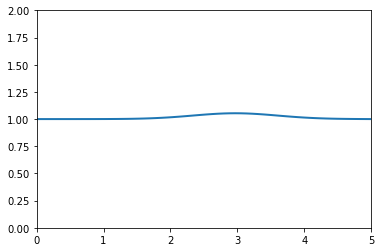

In [4]:
# animate 
# init 
u0 = np.zeros(nx)
u0[:] = 1 
u0[int(3/dx)] = 2 

fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, x_length), ylim=(0, 2))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([],[])
    return (line,)

def animate(frames):
    xs = np.linspace(0,x_length,nx)
    u = u0.copy()       
    for _ in range(time_step):
        for i in range(1,nx-1):
            u0[i] = u[i] + v * (dt/dx**2)* (u[i+1]- 2*u[i]+u[i-1])
    line.set_data(xs,u)
    return line,
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=time_step)
anim.save('diffusion 1d.gif', fps = 20)
plt.show